In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df_raw = pd.read_csv('Datasets/train.csv')
df_raw

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2021-09,ang mo kio,441,Ang Mo Kio Avenue 10,3 room,new generation,67.0,yes,1979,1.366050,103.854168,0.0,chong boon,ang mo kio,north-east region,2200
59996,2023-04,bukit merah,95a,henderson road,4-room,model a,83.0,yes,2019,1.286493,103.821434,0.0,henderson hill,bukit merah,central region,4100
59997,2022-06,tampines,862a,tampines street 83,5-room,improved,122.0,yes,1988,1.355064,103.936507,0.0,tampines west,tampines,east region,2250
59998,2023-01,bedok,67,Bedok Sth Avenue 3,5-room,standard,123.0,yes,1977,1.318974,103.944076,0.0,bedok south,bedok,east region,4700


In [17]:
feature='region'
pd.get_dummies(df_raw[feature], feature, drop_first=True)

,region_east region,region_north region,region_north-east region,region_west region
0,0,0,0,1
1,1,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
59995,0,0,1,0
59996,0,0,0,0
59997,1,0,0,0
59998,1,0,0,0


In [18]:
print(df_raw.block.unique().shape)
print(df_raw.block.isnull().values.any())

(2553,)
False


In [19]:
df_raw['planning_area']=df_raw['planning_area'].astype('category')
df_raw['subzone']=df_raw['subzone'].astype('category')
cat_columns = df_raw.select_dtypes(['category']).columns
df_raw[cat_columns] = df_raw[cat_columns].apply(lambda x: x.cat.codes)
df_raw[['planning_area','subzone']]

,planning_area,subzone
0,12,149
1,1,8
2,26,128
3,18,91
4,14,12
...,...,...
59995,0,31
59996,4,52
59997,25,118
59998,1,10


In [20]:
df_raw[['latitude','longitude']].describe()

,latitude,longitude
count,60000.000000,60000.000000
mean,1.359443,103.840110
std,0.042505,0.071627
min,1.270380,103.685228
25%,1.330939,103.778803
50%,1.354024,103.845301
75%,1.386968,103.897418
max,1.457071,103.964915


<AxesSubplot: xlabel='town'>

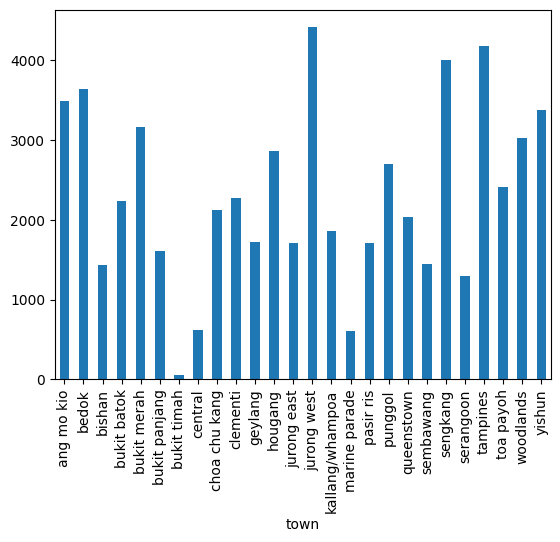

In [21]:
group_count=df_raw.groupby('town')['monthly_rent'].count()
group_count.plot(kind='bar')


<AxesSubplot: xlabel='region'>

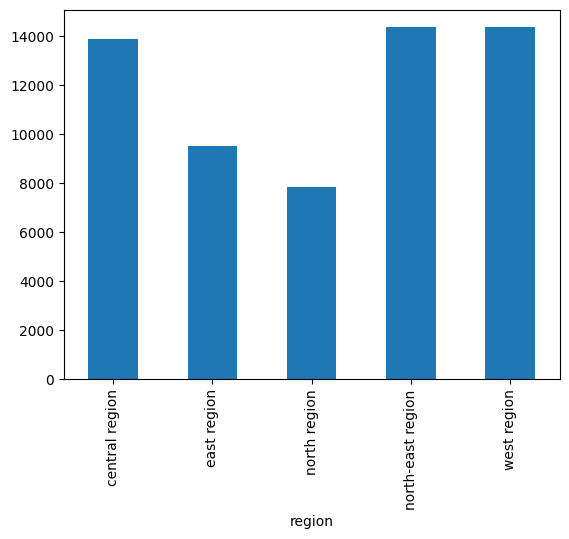

In [22]:
group_count=df_raw.groupby('region')['monthly_rent'].count()
group_count.plot(kind='bar')


<AxesSubplot: xlabel='planning_area'>

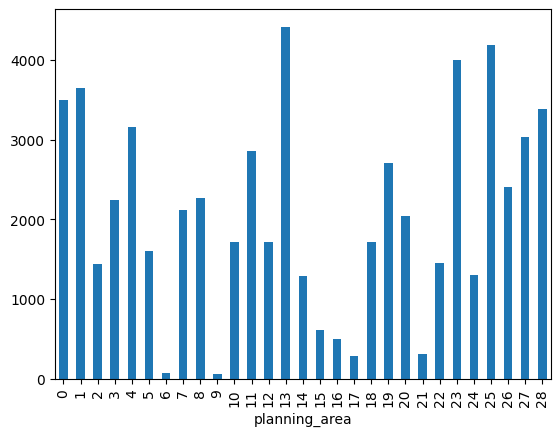

In [23]:
group_count=df_raw.groupby('planning_area')['monthly_rent'].count()
group_count.plot(kind='bar')


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7,

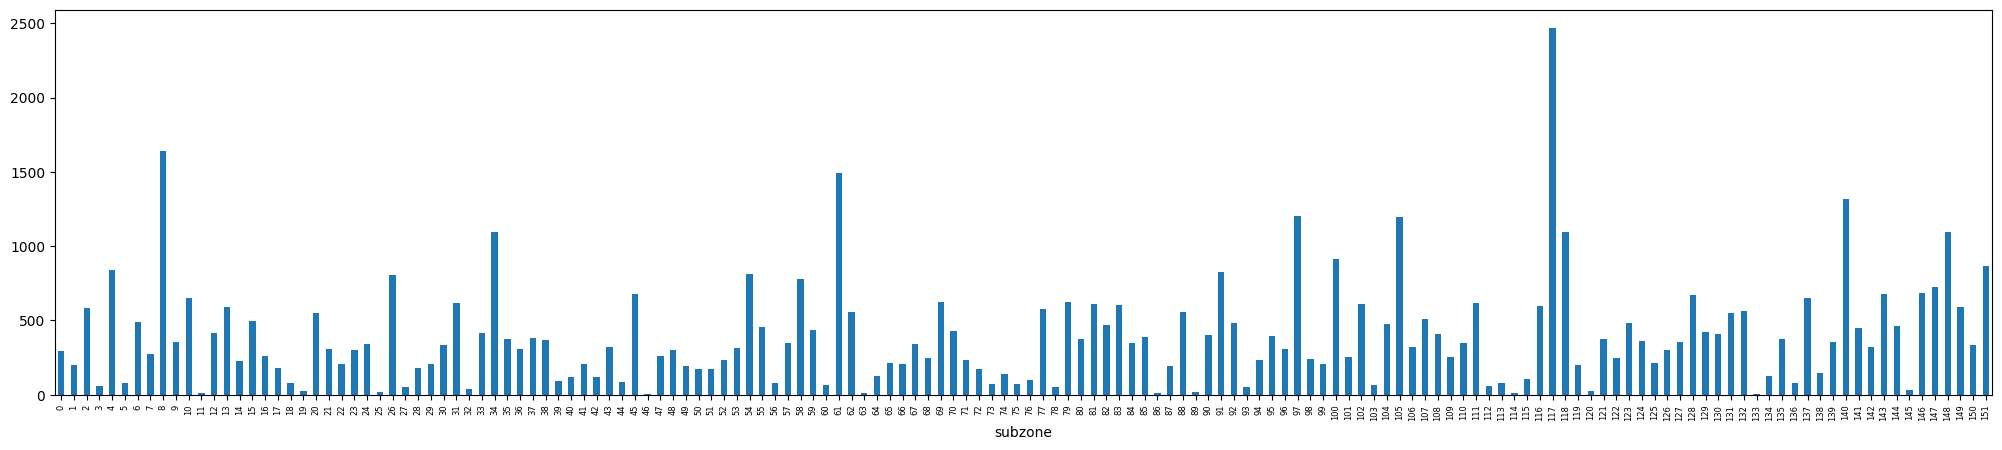

In [24]:
group_count=df_raw.groupby('subzone')['monthly_rent'].count()
group_count.plot(kind='bar',figsize=(25,5))
plt.xticks(fontsize=6)

<AxesSubplot: >

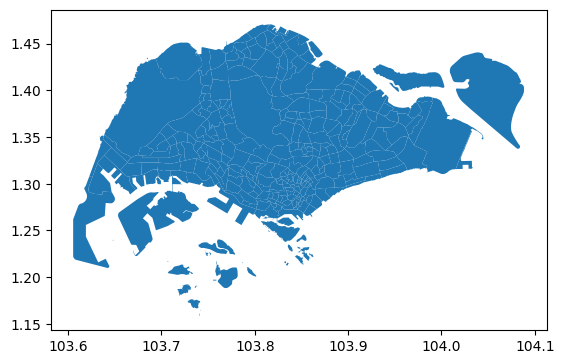

In [25]:
from pyproj import Proj, transform
from pyproj import CRS
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
CRS("WGS84")
data = gpd.read_file('./SubzoneCensus2010SHP/Subzone_Census2010.shp')
#check attributes of shapefile
data.head()
data_epsg4326 = data.to_crs(epsg=4326)
data_epsg4326.crs
data_epsg4326.plot()

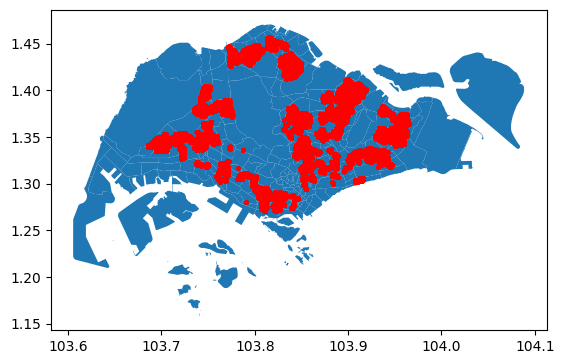

In [26]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(df_raw['longitude'],df_raw['latitude'])]
geodf = GeoDataFrame(data=df_raw[['town','latitude','longitude']],geometry=geometry)

fig,ax = plt.subplots()
data_epsg4326.plot(ax=ax)
geodf.plot(categorical=True,legend=True,figsize=(10,6),color='red',ax=ax, marker='o', markersize=5);

In [30]:
mrt_exist_df = pd.read_csv('./CS5228-ML-Project/auxiliary-data/sg-mrt-existing-stations.csv')
mrt_planned_df = pd.read_csv('./CS5228-ML-Project/auxiliary-data/sg-mrt-planned-stations.csv')
primary_school_df = pd.read_csv('./CS5228-ML-Project/auxiliary-data/sg-primary-schools.csv')    
shopping_mall_df = pd.read_csv('./CS5228-ML-Project/auxiliary-data/sg-shopping-malls.csv') 

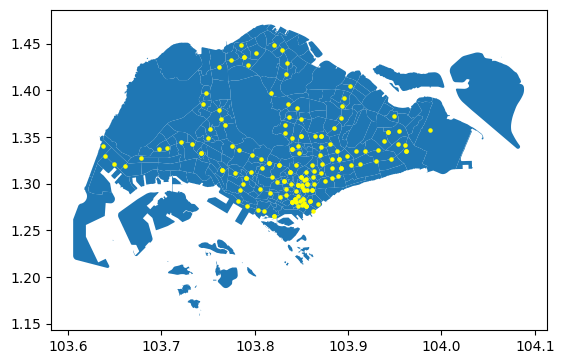

In [31]:
geometry = [Point(xy) for xy in zip(mrt_exist_df['longitude'],mrt_exist_df['latitude'])]
geodf = GeoDataFrame(data=mrt_exist_df[['latitude','longitude']],geometry=geometry)

fig,ax = plt.subplots()
data_epsg4326.plot(ax=ax)
geodf.plot(categorical=True,legend=True,figsize=(10,6),color='yellow',ax=ax, marker='o', markersize=5);

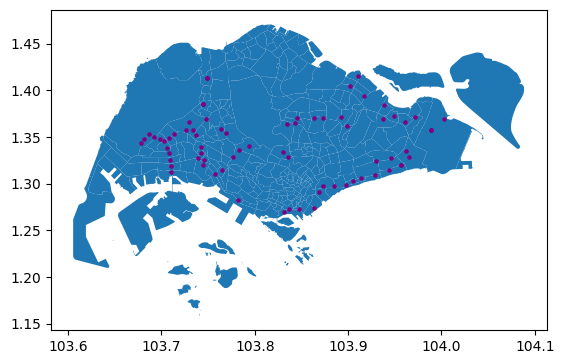

In [36]:
geometry = [Point(xy) for xy in zip(mrt_planned_df['longitude'],mrt_planned_df['latitude'])]
geodf = GeoDataFrame(data=mrt_planned_df[['latitude','longitude']],geometry=geometry)

fig,ax = plt.subplots()
data_epsg4326.plot(ax=ax)
geodf.plot(categorical=True,legend=True,figsize=(10,6),color='purple',ax=ax, marker='o', markersize=5);

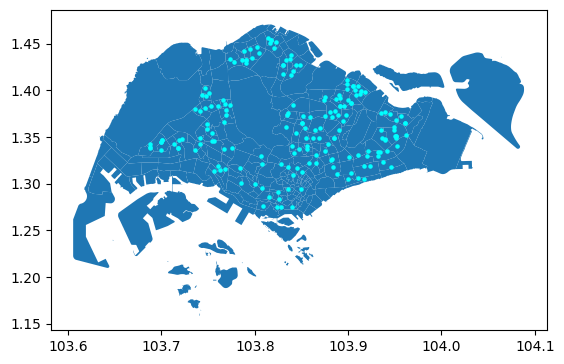

In [37]:
geometry = [Point(xy) for xy in zip(primary_school_df['longitude'],primary_school_df['latitude'])]
geodf = GeoDataFrame(data=primary_school_df[['latitude','longitude']],geometry=geometry)

fig,ax = plt.subplots()
data_epsg4326.plot(ax=ax)
geodf.plot(categorical=True,legend=True,figsize=(10,6),color='aqua',ax=ax, marker='o', markersize=5);

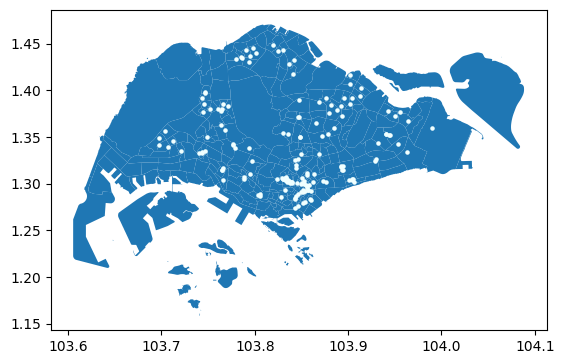

In [38]:
geometry = [Point(xy) for xy in zip(shopping_mall_df['longitude'],shopping_mall_df['latitude'])]
geodf = GeoDataFrame(data=shopping_mall_df[['latitude','longitude']],geometry=geometry)

fig,ax = plt.subplots()
data_epsg4326.plot(ax=ax)
geodf.plot(categorical=True,legend=True,figsize=(10,6),color='azure',ax=ax, marker='o', markersize=5);

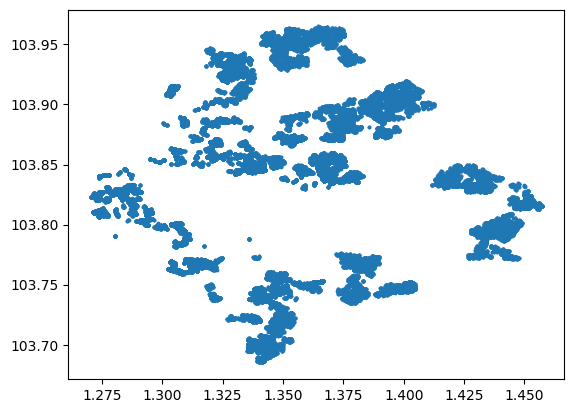

In [ ]:
plt.scatter(x=df_raw['latitude'],y=df_raw['longitude'],s=3)
plt.show()

<Axes: xlabel='planning_area'>

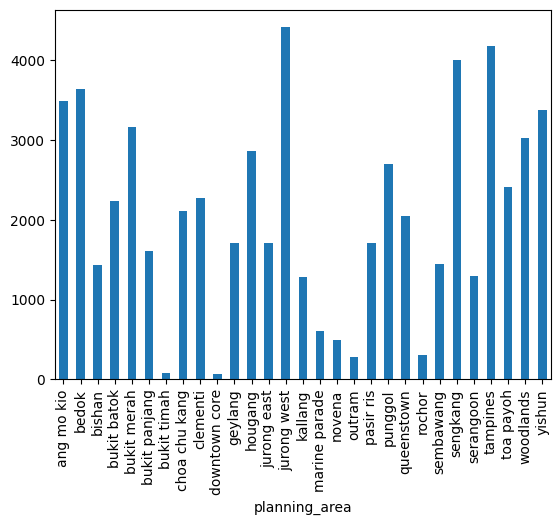

In [ ]:
group_count=df_raw.groupby('planning_area')['monthly_rent'].count()
group_count.plot(kind='bar')


<Axes: xlabel='region'>

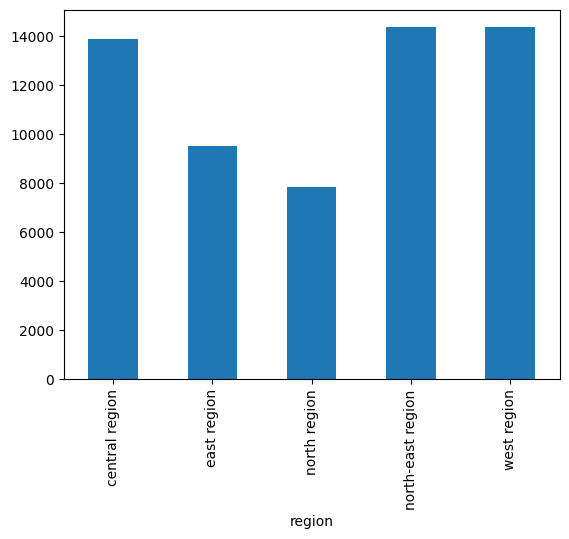

In [ ]:
group_count=df_raw.groupby('region')['monthly_rent'].count()
group_count.plot(kind='bar')
